In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 19 12:20:05 2023

@author: andrey
"""


import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import sys




from passmaker import passmaker
from drawing_spagetti import drawing_spagetti
from drawing_spagetti_absolute_error import drawing_spagetti_absolute_error
from drawing_spagetti_relative_error import drawing_spagetti_relative_error
from drawing_scatter_plot_dyn_oh import drawing_scatter_plot_dyn_oh
from drawing_histogram import drawing_histogram
from drawing_scatter_plot_dyn_oh import drawing_scatter_plot_dyn_oh
from mean_val_plotter import mean_val_plotter
from group_of_scatterplots import group_of_scatterplots

sys.path.append(os.path.abspath(os.path.join('..', '')))

from utilities import load_data

from drawing_relative_and_absolute_errors import drawing_relative_and_absolute_errors
from drawing_the_best_and_worst_results import drawing_the_best_and_worst_results
from compute_SVD import compute_SVD

from simple_plotter_2_speceis import simple_plotter_2_speceis

from drawing_hist2D import drawing_hist2D



/home/g/g260173/miniconda3/envs/gpuenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
epoch = 2

species = ["OH", "HO2", "H2O2"]
species = ["CO","HNO3","SO4","XO2","O1D","SO2","O3P","ALD2","PAN","CH3O","N2O5","NO3","HCHO","O3","C2O3","HO2","NO2","NO","CH3O2","OH"]


if len(species) == 3:

   pass_to_figures = "/Users/andreyvlasenko/tst/Figs_OH_Same/"  
   path = "/Users/andreyvlasenko/tst/data/data_for_paper/dyn_OH_paper/Same_distribution/"
   

   reffile = path + "reference.npy"
   estfile = path + "estimates.npy" #path+"YD" + str(epoch) + ".npy"
   
   
   aux = np.load(estfile) 

   if os.path.isfile(reffile):
       aux1 = np.load(reffile) 
       max_c1 = np.load(path+"max_c.npy")        
   else:
       print("file does not exist")
       aux1, max_c1 = load_data(path, dtype=torch.float32 ,species =species)
       

   aux  = np.asarray(aux[:,6000:-2,:])
   aux1 = np.asarray(aux1[:50,6000:-2,:])
   # aux  = np.asarray(aux[:50,:6000,:])
   # aux1 = np.asarray(aux1[:50,:6000,:])
   Xticks = ['0(0)','30(3K)','60(6K)']
   Xticks = ['0(0)','722(4.3M)',"1440(8.6M)"]   
#   xlabel = "Seconds(steps)"
   xlabel = "minutes(steps)"
   fx = 1
   fy = 3
   scheme ="dyn_OH1"

else:
 
   pass_to_figures = "FIGS"  
   path = "/work/gg0302/g260141/NACHMO_data/data_for_paper/Verwer_paper/Same_distribution/"

   reffile = path + "reference.npy"
   estfile = path + "estimates.npy" #path+"YD" + str(epoch) + ".npy"
   aux = np.load(estfile) 

   if os.path.isfile(reffile):
       aux1 = np.load(reffile) 
       max_c1 = np.load(path+"max_c.npy")        
   else:
       print("file does not exist")
       aux1, max_c1 = load_data(path, dtype=torch.float32 ,species =species) 
       
   aux  = np.asarray(aux[:,:-1:10,:])
   aux1 = np.asarray(aux1)
   scheme ="Verwer"


   Xticks = ['0(0)','1(60)','2(12)']
#   Xticks = ['0(0)','6(260K)','12(520K)']
   Xticks2M = ['0(0)','1(4.5K)','2(9K)']

   xlabel = "months(steps)"
   xlabel = "hours(steps)"
   fx = 5
   fy = 4

file does not exist


In [4]:
ylabel = "ppb"

max_c = np.load(path+"max_c.npy") 
    
[ncells,timesteps0,conc] = aux.shape
[ncells,timesteps1,conc] = aux1.shape
timesteps = np.min([timesteps0,timesteps1])


timesteps = timesteps - 160


if len(species) > 3:
    timesteps = timesteps - 160
    timesteps2m = int(timesteps/12)*2



for i in range(0,len(species)):
    aux[:,:,i]  = aux[:,:,i]  * max_c[i]
    aux1[:,:,i] = aux1 [:,:,i] * max_c1[i]
    print("M = ", max_c[i]/max_c1[i])




#print("aux.shape = ", aux.shape, "aux1.shape = ", aux1.shape)


skip = int(timesteps/400)


if skip == 0: skip = 1


c_est = aux[:,0:timesteps:skip,:]
c_ref = aux1[:,0:timesteps:skip,:]

if len(species)>3:
     skip2m = int(timesteps2m/400)
     c_est2m = aux[:,0:timesteps2m:skip,:]
     c_ref2m = aux1[:,0:timesteps2m:skip,:]


abs_err = c_est - c_ref

rel_err = np.zeros(abs_err.shape)


[ncells,timesteps,conc] = abs_err.shape
c_est[np.isnan(c_est)] = 0


for i in range(0,ncells):
    for j in range(0,timesteps):
        for k in range(0,conc):
            rel_err[i,j,k] = 100 * abs_err[i,j,k]/(c_ref[i,j,k] + 0.001*max_c[k]) #np.max(np.ndarray.flatten(c_ref[i,:,i]))    #np.std(np.ndarray.flatten(c_ref[:,:,i]))

M =  1.112590977902075
M =  0.39161075789244026
M =  0.9944939927309084
M =  1.0391401764340145
M =  1.1153156536636546
M =  1.0041430277214793
M =  1.115398946922615
M =  0.9978458348155739
M =  1.191126782961013
M =  1.253411640254446
M =  1.6044521560806912
M =  1.387191654684716
M =  1.0028703994560937
M =  1.115315653663653
M =  1.2911925529770236
M =  1.079211025504988
M =  1.1335502408935487
M =  1.0048119466405425
M =  1.7835574028359908
M =  1.0212930053629574


Creating directory FIGS
Steps =  1


/home/g/g260173/code/nachmo_coding/nachmo_mlp/Visualization for paper/group_of_scatterplots.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","", ""], fontsize =1)
/home/g/g260173/code/nachmo_coding/nachmo_mlp/Visualization for paper/group_of_scatterplots.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","", ""], fontsize =1)
/home/g/g260173/code/nachmo_coding/nachmo_mlp/Visualization for paper/group_of_scatterplots.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","", ""], fontsize =1)
/home/g/g260173/code/nachmo_coding/nachmo_mlp/Visualization for paper/group_of_scatterplots.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks,

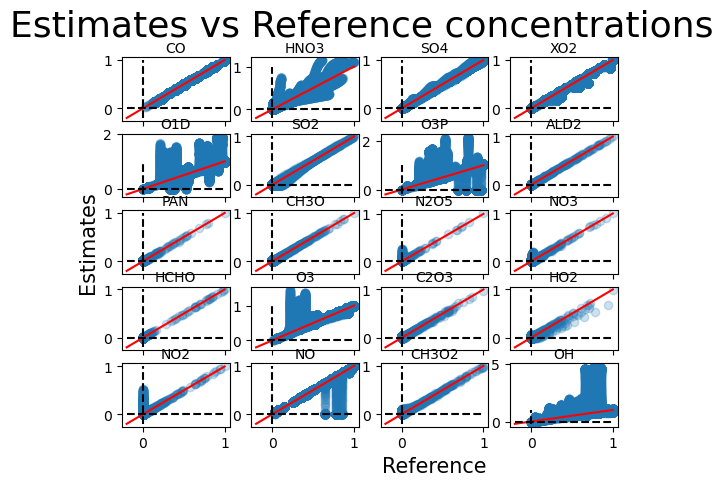

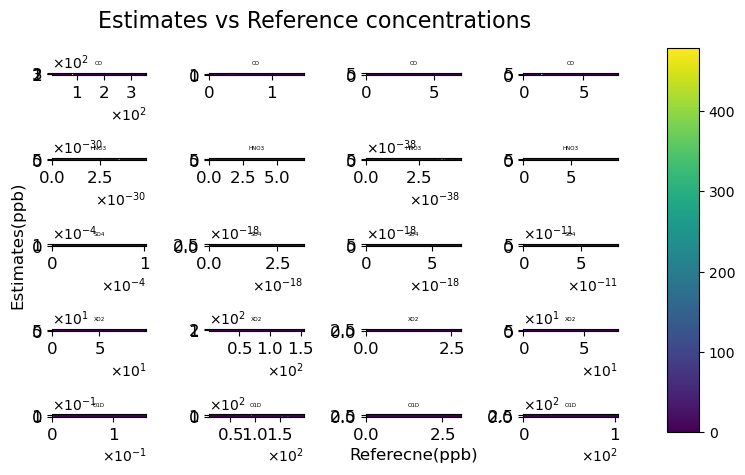

Steps =  406


/home/g/g260173/code/nachmo_coding/nachmo_mlp/Visualization for paper/drawing_relative_and_absolute_errors.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","", ""], fontsize =1)
/home/g/g260173/code/nachmo_coding/nachmo_mlp/Visualization for paper/drawing_relative_and_absolute_errors.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","", ""], fontsize =1)
/home/g/g260173/code/nachmo_coding/nachmo_mlp/Visualization for paper/drawing_relative_and_absolute_errors.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","", ""], fontsize =1)
/home/g/g260173/code/nachmo_coding/nachmo_mlp/Visualization for paper/drawing_relative_and_absolute_errors.py:84: UserWarning: set_ti

Steps =  406


/home/g/g260173/code/nachmo_coding/nachmo_mlp/Visualization for paper/drawing_the_best_and_worst_results.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","", ""], fontsize =1)
/home/g/g260173/code/nachmo_coding/nachmo_mlp/Visualization for paper/drawing_the_best_and_worst_results.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","", ""], fontsize =1)
/home/g/g260173/code/nachmo_coding/nachmo_mlp/Visualization for paper/drawing_the_best_and_worst_results.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","", ""], fontsize =1)
/home/g/g260173/code/nachmo_coding/nachmo_mlp/Visualization for paper/drawing_the_best_and_worst_results.py:79: UserWarning: set_ticklabels

Steps =  406
Steps =  48
Steps =  405
Steps =  406


(<Figure size 640x480 with 20 Axes>, <Axes: title={'center': 'OH'}>)

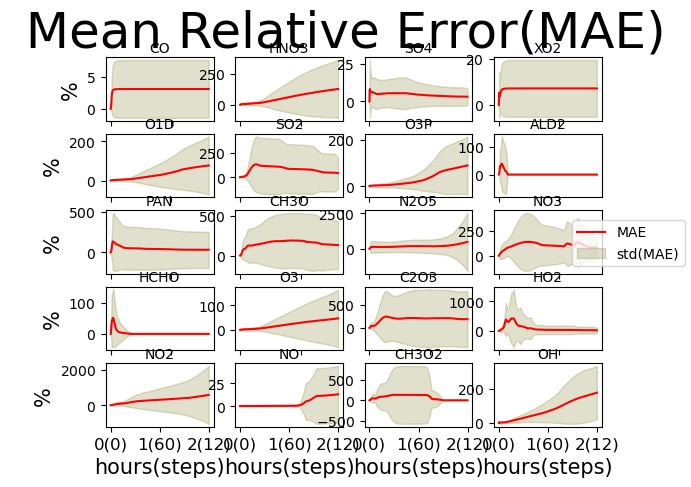

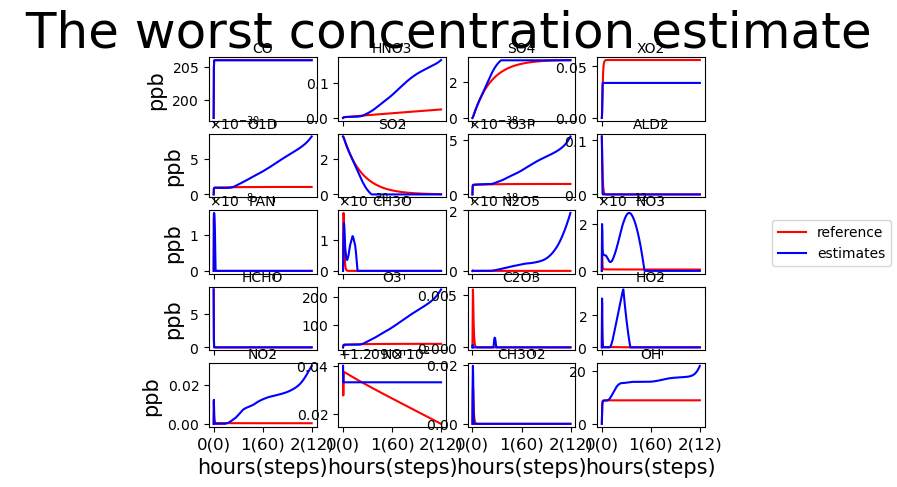

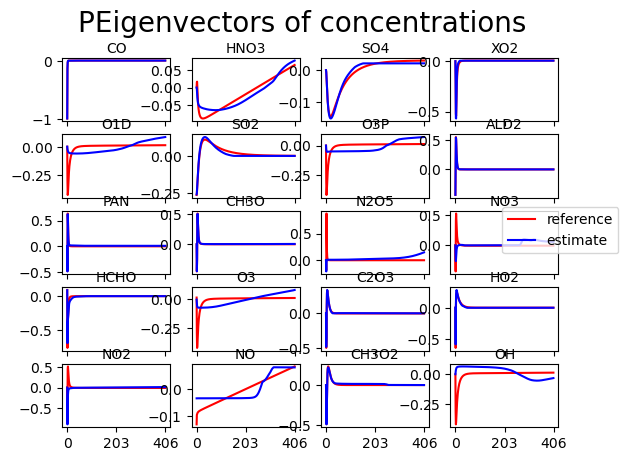

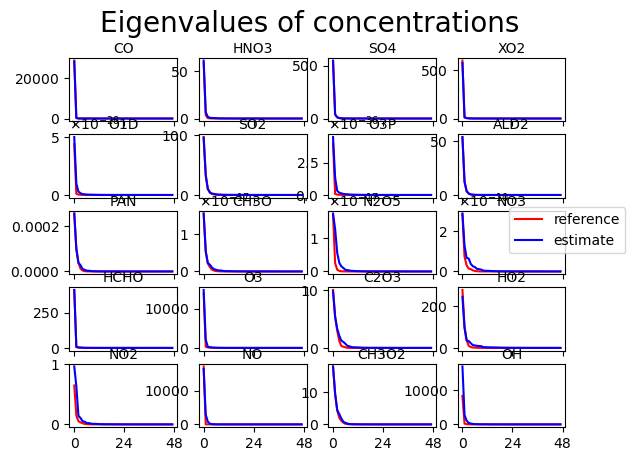

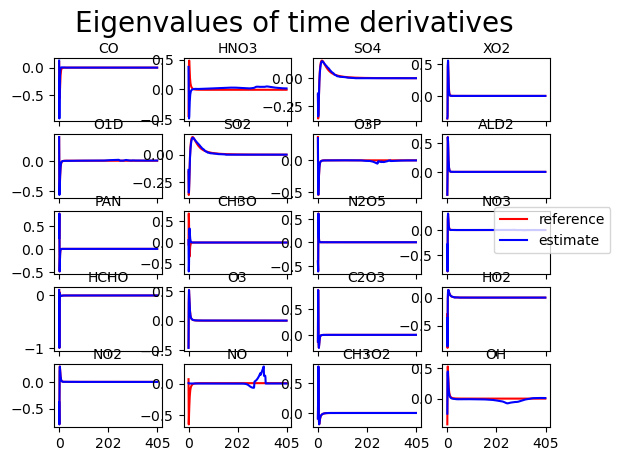

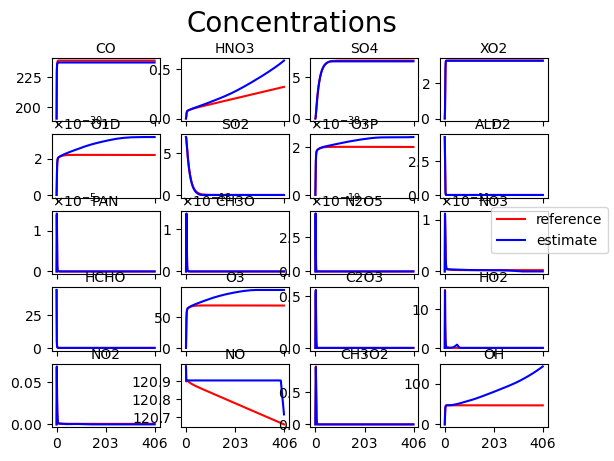

In [5]:
passmaker(passf = pass_to_figures) # creating difectory containing figures


         


# passF =pass_to_figures + 'conc'
# drawing_spagetti(species, c_est, c_ref, passf = passF , xticks = xticks ,  xlabel = xlabel , ylabel = "Concentrations(ppb)")


# passF =pass_to_figures + 'error'
# drawing_spagetti_absolute_error(species, abs_err, passf = passF , xticks = xticks,  xlabel = xlabel , ylabel = "Error in ppb")

# drawing_spagetti_relative_error(species, rel_err, passf = passF , xticks = xticks,  xlabel = xlabel , ylabel = "Error in % ")


step = len(c_est[0,:,0]) -1

passF =pass_to_figures + 'scatter_plots'
#drawing_scatter_plot_dyn_oh(species, c_est, c_ref, step = step, alp = 0.75, passf = None, title =None) # "Scatter plot of reference vs estimateed for ")
# # passF =pass_to_figures + 'histogram'


C_ref = np.reshape(c_ref, [len(c_ref) * len(c_ref[0]), 1, len(species)])
C_est = np.reshape(c_est, [len(c_ref) * len(c_ref[0]), 1, len(species)])

passF =pass_to_figures + 'Group_of_scatterplots'

group_of_scatterplots(C_ref,C_est, species, 0, alp = 0.225,  xticks = " ", passf = None, title = "Estimates vs Reference concentrations",  xlabel = "Reference", ylabel = "Estimates", namef = None,  fx = fx, fy = fy )


drawing_hist2D(c_ref, c_est, species, bins = 100, xticks =Xticks, passf = None, title = "Estimates vs Reference concentrations" , xlabel = 'Referecne(ppb)', ylabel = 'Estimates(ppb)', namef = None,  fx = 5, fy = 4 )


# drawing_histogram(species, aux[:,step,:], passf = passF + 'hist/')


#passF =pass_to_figures + 'mean_conc'

#mean_val_plotter(c_ref, c_est, species, xticks =Xticks ,passf = passF, title = " Mean of estimates and true concentrations " , xlabel = xlabel, ylabel = ylabel, namef = None, scheme = scheme, fx = fx, fy = fy ) #1,3 # 5,4

#if len(species)>3:  
#     mean_val_plotter(c_ref2m, c_est2m, species, xticks =Xticks2M ,passf = passF, title = " Mean of estimates and true concentrations " , xlabel = xlabel, ylabel = ylabel, namef = None, scheme = scheme, fx = fx, fy = fy ) #1,3 # 5,4



#   §1group_of_scatterplots(c_ref,c_est, species, step = len(c_est[0,:,0])-1, alp = 0.125,  xticks = " ", passf = None, title = " Scatter plots of estimates and true concentrations" ,  xlabel = "Reference", ylabel = "Estimates", namef = None,  fx = fx, fy = fy )



#passF =pass_to_figures + 'error'
#drawing_relative_and_absolute_errors(abs_err, species, xticks = Xticks, passf = passF, title = " Mean Absolute Error(MAE) " , xlabel = xlabel, ylabel = ylabel, namef = "Mean_abs_Error_day", fx = fx, fy = fy )


#passF =pass_to_figures + 'error'
drawing_relative_and_absolute_errors(rel_err, species, xticks = Xticks, passf = None, title = " Mean Relative Error(MAE) " , xlabel = xlabel, ylabel = "%", namef = None, fx = fx, fy = fy )

# passF =pass_to_figures + 'conc'

drawing_the_best_and_worst_results(rel_err, c_est,c_ref, species, xticks = Xticks, passf = None , title = " The worst concentration estimate " , xlabel = xlabel, ylabel = ylabel, namef = None, fx = fx, fy = fy )

l = 1

U,S,V,RU,RS,RV = compute_SVD(c_est, c_ref)


simple_plotter_2_speceis( np.squeeze(RV[l,:,:]),np.squeeze(V[l,:,:]), xticks = Xticks, xlabel = "" , ylabel = "", title = "PEigenvectors of concentrations", species = species, fx = 5, fy = 4 )  
    
simple_plotter_2_speceis( np.squeeze(RS[:,:]),np.squeeze(S[:,:]), xticks = ['0',str(int(len(S)/2)),str(int(len(S)))], xlabel = "" , ylabel = "", title = "Eigenvalues of concentrations", species = species, fx = 5, fy = 4 ) 
    
dy = c_est[:,1:,:] - c_est[:,:-1,:]
dref = c_ref[:,1:,:] - c_ref[:,:-1,:]


U,S,V,RU,RS,RV = compute_SVD(dy, dref)

simple_plotter_2_speceis( RV[l,:,:], V[l,:,:], xticks = Xticks, xlabel = "" , ylabel = "", title = "Eigenvalues of time derivatives", species = species, fx = 5, fy = 4 ) 


simple_plotter_2_speceis( c_ref[l,:,:], c_est[l,:,:], xticks = Xticks, xlabel = "" , ylabel = "", title = "Concentrations", species = species, fx = 5, fy = 4 ) 